# Problems Notebook
Author: Myles Henehan
// Module: Applied Statistics


## Problem 1: Extending the Lady Tasting Tea

In our first problem, we examine Fisher’s classic “Lady Tasting Tea” experiment from his 1935 book *The Design of Experiments*. The story behind the experiment is that a woman (often informally identified as Dr. Muriel Bristol) claimed she could detect whether milk was poured into a cup before or after the tea. To test this, Fisher prepared 8 cups—4 with milk added first and 4 with tea added first—randomized their order, and asked her to identify each cup’s preparation method. The null hypothesis is that she has no genuine ability to tell the difference, while the alternative hypothesis is that she can. Although the original experiment used 8 cups, we will extend the setup to 12 cups to explore how increasing the sample size affects the analysis.


Before we start, let's import any libraries that may be of use to us.

In [37]:
# Mathematical functions from the standard library (https://docs.python.org/3/library/math.html)
import math
# Permutations and combinations (https://docs.python.org/3/library/itertools.html)
import itertools
# Random selections (https://docs.python.org/3/library/random.html)
import random
# Numerical structures and operations (https://numpy.org/doc/stable/reference/index.html#reference)
import numpy as np
# Plotting (https://matplotlib.org/stable/contents.html)
import matplotlib.pyplot as plt

### Original Experiment:

Before extending the experiment, it’s useful to revisit the structure and purpose of Fisher’s original design. By understanding the logic behind the classic setup—its hypotheses, randomization, and reasoning—we establish a clear baseline for comparison. This recap will help highlight how changes in sample size or configuration influence the statistical properties of the test when we later adapt the experiment to 12 cups.

Number of combinations: 70
Milk-first cups (random selection): [2, 5, 6, 7]
Overlap counts: (array([0, 1, 2, 3, 4]), array([ 1, 16, 36, 16,  1]))


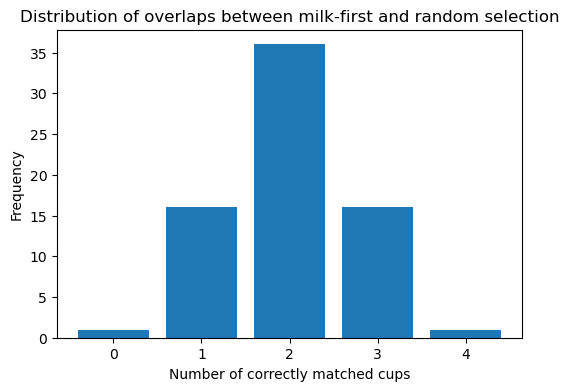

The probability of choosing 0 cups correctly is 0.0143
The probability of choosing 1 cups correctly is 0.2286
The probability of choosing 2 cups correctly is 0.5143
The probability of choosing 3 cups correctly is 0.2286
The probability of choosing 4 cups correctly is 0.0143


In [38]:
# Set the total number of cups in the original experiment
no_cups = 8
# Set the number of cups where milk is added first
no_cups_milk_first = 4
# Set the number of cups where tea is added first
no_cups_tea_first = 4


# Calculate the number of combinations of choosing 4 cups out of 8 (Fisher's 70)
no_possibilities = math.comb(no_cups, no_cups_milk_first)
# Print the total number of possible assignments
print("Number of combinations:", no_possibilities)


# Create a list of cup labels from 0 to 7
labels = list(range(no_cups))
# Randomly select 4 unique cups that will represent the "milk-first" assignment
labels_milk = random.sample(labels, no_cups_milk_first)
# Sort the selected labels so the output is easier to read
labels_milk.sort()
# Print the randomly selected milk-first cups
print("Milk-first cups (random selection):", labels_milk)


# Generate all possible combinations of choosing 4 cups out of 8
combs = list(itertools.combinations(labels, no_cups_milk_first))

# Create an empty list to store how many cups overlap with our random selection
no_overlaps = []

# Loop over every possible combination
for comb in combs:
    # Compute how many cups in this combination are also in the randomly selected set
    overlap = len(set(comb).intersection(labels_milk))
    # Store the number of overlaps
    no_overlaps.append(overlap)


# Count how often each overlap value occurs
counts = np.unique(no_overlaps, return_counts=True)
# Print the overlap counts
print("Overlap counts:", counts)


# Create a figure for the bar plot
fig, ax = plt.subplots(figsize=(6, 4))
# Plot the distribution of overlaps
ax.bar(counts[0], counts[1])
# Label the x-axis
ax.set_xlabel("Number of correctly matched cups")
# Label the y-axis
ax.set_ylabel("Frequency")
# Add title to the plot
ax.set_title("Distribution of overlaps between milk-first and random selection")
# Display the plot
plt.show()


# Compute the theoretical probabilities using Fisher’s exact combinatorial formula
probabilities = [(math.comb(4, k) * math.comb(4, 4-k)) / no_possibilities for k in range(5)]

# Print the probability of getting k cups correct for k = 0 to 4
for k, p in enumerate(probabilities):
    print(f"The probability of choosing {k} cups correctly is {p:.4f}")




### Adapting the Experiment

To extend the experiment, we’ll use the same approach as before, but apply it to a larger set of cups.

As per before, we start by setting the number of samples for our experiment.

In [39]:
# Number of cups of tea in total.
no_cups_v2 = 12
# Number of cups of tea with milk in first.
no_cups_milk_first_v2 = 4
# Number of cups of tea with tea in first.
no_cups_tea_first_v2 = 8

Once we've defined the number of samples, we can then work out the number of possible combinations.

In [40]:
# Again, we use math.comb to figure out the number of possiblities, this picking 4 cups from 12.
no_possibilities_v2 = math.comb(no_cups_v2, no_cups_milk_first_v2)
# Output this number
print("Number of combinations:", no_possibilities_v2)

Number of combinations: 495


As we can see above, there are 495 different ways of picking 4 cups from a sample size of 12.

In [41]:
labels_v2 = list(range(no_cups_v2))
labels_milk_v2 = random.sample(labels_v2, no_cups_milk_first_v2)
labels_milk_v2.sort()
print("Milk-first cups (random selection):", labels_milk_v2)

Milk-first cups (random selection): [0, 5, 7, 10]


In [42]:
# All possible ways milk could be placed
combs_v2 = list(itertools.combinations(labels_v2, no_cups_milk_first_v2))
no_overlaps_v2 = []
for comb in combs_v2:
    overlap_v2 = len(set(comb).intersection(labels_milk_v2))
    no_overlaps_v2.append(overlap_v2)

In [43]:
# Count overlap frequencies
counts_v2 = np.unique(no_overlaps_v2, return_counts=True)
print("Overlap counts:", counts_v2)

Overlap counts: (array([0, 1, 2, 3, 4]), array([ 70, 224, 168,  32,   1]))


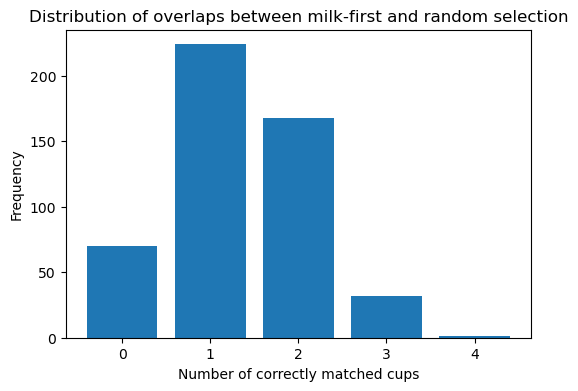

In [44]:
# Plot distribution
fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(counts_v2[0], counts_v2[1])
ax.set_xlabel("Number of correctly matched cups")
ax.set_ylabel("Frequency")
ax.set_title("Distribution of overlaps between milk-first and random selection")
plt.show()

In [45]:
# Converted to probabilities (divide by 70):
probabilities_v2 = [(math.comb(4, k) * math.comb(8, 4-k)) / no_possibilities_v2 for k in range(5)]

# For each probability, print how likely it is to get k cups correct.
for k, p in enumerate(probabilities_v2):
    print(f"The probability of choosing {k} cups correctly is {p:.4f}")

The probability of choosing 0 cups correctly is 0.1414
The probability of choosing 1 cups correctly is 0.4525
The probability of choosing 2 cups correctly is 0.3394
The probability of choosing 3 cups correctly is 0.0646
The probability of choosing 4 cups correctly is 0.0020


### What does this probability mean?

As shown above, increasing the total number of cups makes it less likely that the lady will correctly identify all four, assuming she is selecting at random. Let’s explore this behaviour in more detail.

Intuitively, the more options she has to choose from, the lower the probability of getting every cup right by chance. In our example, this probability falls from about 1.43% to just 0.2% as the number of possible choices increases. Under the null hypothesis — that the lady is simply guessing — each possible arrangement is equally likely. When the number of possible arrangements grows, the chance of selecting the correct one purely by luck becomes smaller.

In both scenarios, the resulting p-value is very low, which offers evidence against the null hypothesis and suggests that the lady may indeed possess the ability to distinguish between the cups if she does guess correctly (Khan Academy, https://www.youtube.com/watch?v=KS6KEWaoOOE).

### Statistical Significance

In hypothesis testing, statistical significance acts as a gatekeeper, which helps to decide whether to accept or reject the null hypothesis (Statsig, https://www.statsig.com/perspectives/what-is-statistical-significance).Typically, a p-value of less than 0.05 is considered statistically significant, so this is what researchers would normally consider the p-value threshold, denoted by α (Statsig, https://www.statsig.com/perspectives/alpha-significance-level-statistics). In our experiment, both scenarios have a p-value of less than 0.05, so we would consider them both statistically significant under the common threshold, but the question we need to ask ourselves is whether it is worthwhile adjusting the threshold.

To answer this, we would need to consider what we are trying to achieve. Lowering the threshold won't change our conclusion, because in either case, we would reject the null hypothesis. Nonetheless, it does have an effect on our confidence level (Analytics Toolkit, https://blog.analytics-toolkit.com/2018/confidence-intervals-p-values-percent-change-relative-difference/). 

One argument for reducing the significance threshold is the extraordinary nature of the claim. To quote Sagan (1995), "Extraordinary claims require extraordinary evidence". This is a quote commonly cited in statistics to support a stricter significance threshold for more unusual claims. Choosing a lower p-value threshold can be justified in this experiment, since the claim being tested — that the lady can distinguish the cups by taste — is somewhat unlikely and therefore requires stronger evidence.

However, it is also important to consider how costly it would be to draw the wrong conclusion. In fields such as medical research, a strict threshold is used because the consequences of being wrong can be serious (Statsig, https://www.statsig.com/perspectives/significance-stricter-threshold); it is often preferable to avoid false positives, even at the risk of missing true effects. By contrast, in a low-stakes setting like tea tasting, the outcome carries little real-world consequence. Therefore, while a lower threshold could be justified on the basis of the claim’s unusual nature, it is not strictly necessary given the context.



## Problem 2: Normal Distribution

Brief: Generate 100,000 samples of size 10 from the standard normal distribution. For each sample, compute the standard deviation with ddof=1 (sample SD) and with ddof=0 (population SD). Plot histograms of both sets of values on the same axes with transparency. Describe the differences you see. Explain how you expect these differences to change if the sample size is increased.

Let's start by generating the samples.

In [36]:

# Generate 100,000 samples, each of size 10 (eg. 10 sets of 100000 rows/samples), using standard normal distribution.
samples = np.random.normal(size=(100000, 10))

# Check the top row of data for reference.
print(samples[0])

[ 0.20883159  3.08230548 -0.71846247  0.60161992 -0.73876596  1.10668322
 -2.05796588 -0.21020141  1.13158559 -1.27166595]


As we can see, these 10 values converge around 0 as the mean, since we didn't choose the Loc parameter (https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). They also use the default standard distribution of 1.

Now let's plot this. Since we have a set of continuous values, it would make most sense to show this in a histogram.

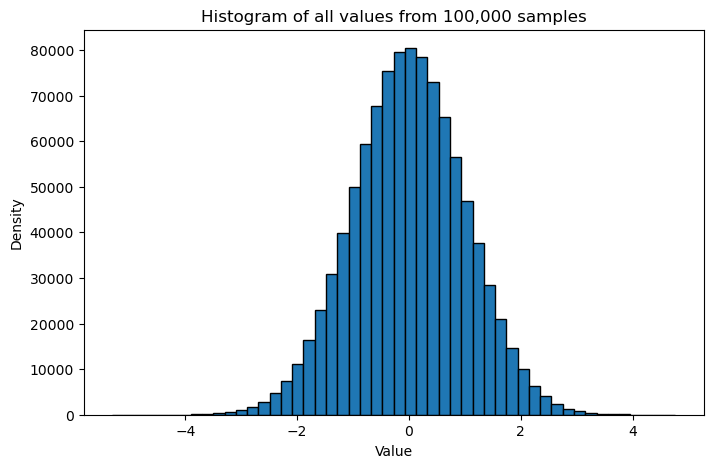

In [46]:
# Flatten the 2D array to 1D so we can plot all values together
all_values = samples.flatten()

# Create a figure and an axes object
fig, ax = plt.subplots(figsize=(8, 5))
# Plot a histogram of all values
ax.hist(all_values, bins=50, edgecolor='black')
# Set the x-axis label
ax.set_xlabel("Value")
# Set the y-axis label
ax.set_ylabel("Density")
# Set the plot title
ax.set_title("Histogram of all values from 100,000 samples")
# Display the plot
plt.show()
